In [2]:
# import dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [3]:
# Loading the files 
file_path = "cardio.csv"

In [4]:
# Read the data file and store it in a Pandas DataFrame.
cardio_df = pd.read_csv(file_path)
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [5]:
# Formatting the year as the whole number
cardio_df['New_age'] = cardio_df['age'].map("{:.0f}".format)

In [6]:
# Format the age /365
cardio_df['New_age'] = cardio_df['age'] / 365

# Make the whole number
cardio_df['New_age'] = cardio_df['New_age'].map("{:.0f}".format)

# replace 'age' column.
cardio_df.drop('age', axis=1, inplace=True)

# Rearrange the columns
cardio_df = cardio_df[['id', 'New_age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                                    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] 

# Rename the new 'age' column 
cardio_df = cardio_df.rename(columns = {"New_age":"Age"}) 
cardio_df.head()

,id,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,52,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,48,1,156,56,100,60,1,1,0,0,0,0


In [7]:
# Check data types
cardio_df.dtypes

id              int64
Age            object
gender          int64
height          int64
weight          int64
ap_hi           int64
ap_lo           int64
cholesterol     int64
gluc            int64
smoke           int64
alco            int64
active          int64
cardio          int64
dtype: object

In [8]:
cardio_df.head(10)

,id,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,52,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,48,1,156,56,100,60,1,1,0,0,0,0
5,8,60,1,151,67,120,80,2,2,0,0,0,0
6,9,61,1,157,93,130,80,3,1,0,0,1,0
7,12,62,2,178,95,130,90,3,3,0,0,1,1
8,13,48,1,158,71,110,70,1,1,0,0,1,0
9,14,54,1,164,68,110,60,1,1,0,0,0,0


In [9]:
# To make the data clean remove  outliers because large set of data in the important catagoreis 
# Note I need to do research to understand alco, ap_lo, ap_hi , cardio in this schedule what does it mean .?

In [10]:
# ap hi maximum heart rate is around 220 beats per minute and the minumum is 100
#  Increasingly, experts pin an ideal resting heart rate at between 50 to 70 beats per minute

# Removing  outliers in the 'ap_hi' coulmn that are above 220
cardio_df.drop(cardio_df[cardio_df['ap_hi'] > 220].index, inplace = True)

# Remove outliers in the 'ap_hi' coulmn that are below 100
cardio_df.drop(cardio_df[cardio_df['ap_hi'] < 100].index, inplace = True)

In [11]:
# ap lo maximum heart rate is around 150 beats per minute and the minumum is 65
# Removing  outliers in the 'ap_lo' coulmn that are above  150
cardio_df.drop(cardio_df[cardio_df['ap_lo'] > 140].index, inplace = True)
# Remove outliers in the 'ap_lo' coulmn that are below 65
cardio_df.drop(cardio_df[cardio_df['ap_lo'] < 60].index, inplace = True)

In [12]:
cardio_df.head(10)

,id,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,52,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,48,1,156,56,100,60,1,1,0,0,0,0
5,8,60,1,151,67,120,80,2,2,0,0,0,0
6,9,61,1,157,93,130,80,3,1,0,0,1,0
7,12,62,2,178,95,130,90,3,3,0,0,1,1
8,13,48,1,158,71,110,70,1,1,0,0,1,0
9,14,54,1,164,68,110,60,1,1,0,0,0,0


In [13]:
# Converting  'height' column from cm to feet each cm = 0.032808399 foot

cardio_df['height'] = round(cardio_df['height']*0.0328084, 2)

In [14]:
# Converting 'weight' from kg to lb  1kg = 2.20462 lbs
cardio_df['weight'] = round(cardio_df['weight'] * 2.20462, 1)

In [15]:
cardio_df.head(10)

,id,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,5.51,136.7,110,80,1,1,0,0,1,0
1,1,55,1,5.12,187.4,140,90,3,1,0,0,1,1
2,2,52,1,5.41,141.1,130,70,3,1,0,0,0,1
3,3,48,2,5.54,180.8,150,100,1,1,0,0,1,1
4,4,48,1,5.12,123.5,100,60,1,1,0,0,0,0
5,8,60,1,4.95,147.7,120,80,2,2,0,0,0,0
6,9,61,1,5.15,205.0,130,80,3,1,0,0,1,0
7,12,62,2,5.84,209.4,130,90,3,3,0,0,1,1
8,13,48,1,5.18,156.5,110,70,1,1,0,0,1,0
9,14,54,1,5.38,149.9,110,60,1,1,0,0,0,0


In [16]:
cardio_df.shape

(67524, 13)

In [17]:
y = cardio_df['cardio']

In [18]:
X = cardio_df.drop(['cardio'], 1).values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
from sklearn.preprocessing import StandardScaler
# standard scaler instance
X_scaler = StandardScaler()

In [21]:
# fit standard scaler
X_scaler.fit(X_train)

StandardScaler()

In [22]:
# scale features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
import tensorflow as tf

# neural net
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8
hidden_nodes_layer4 = 4
hidden_nodes_layer5 = 4

nn_model = tf.keras.models.Sequential()

In [24]:
# first layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation="relu"))

In [25]:
# second layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

In [26]:
# 3d layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

In [27]:
# 4th layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

In [28]:
# 5th layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

In [29]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# check the structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                260       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 561
Trainable params: 561
Non-trainable params: 0
__________________________________________________________

In [31]:
# compile model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:

# train model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1583/1583 [==============================] - 1s 500us/step - loss: 0.5975 - accuracy: 0.7088
Epoch 2/100
1583/1583 [==============================] - 1s 498us/step - loss: 0.5558 - accuracy: 0.7297
Epoch 3/100
1583/1583 [==============================] - 1s 523us/step - loss: 0.5481 - accuracy: 0.7316
Epoch 4/100
1583/1583 [==============================] - 1s 500us/step - loss: 0.5456 - accuracy: 0.7312
Epoch 5/100
1583/1583 [==============================] - 1s 493us/step - loss: 0.5438 - accuracy: 0.7333
Epoch 6/100
1583/1583 [==============================] - 1s 489us/step - loss: 0.5433 - accuracy: 0.7338
Epoch 7/100
1583/1583 [==============================] - 1s 491us/step - loss: 0.5424 - accuracy: 0.7335
Epoch 8/100
1583/1583 [==============================] - 1s 489us/step - loss: 0.5421 - accuracy: 0.7343
Epoch 9/100
1583/1583 [==============================] - 1s 490us/step - loss: 0.5417 - accuracy: 0.7345
Epoch 10/100
1583/1583 [==============================]

1583/1583 [==============================] - 1s 510us/step - loss: 0.5357 - accuracy: 0.7407
Epoch 79/100
1583/1583 [==============================] - 1s 514us/step - loss: 0.5359 - accuracy: 0.7397
Epoch 80/100
1583/1583 [==============================] - 1s 502us/step - loss: 0.5357 - accuracy: 0.7403
Epoch 81/100
1583/1583 [==============================] - 1s 502us/step - loss: 0.5358 - accuracy: 0.7399
Epoch 82/100
1583/1583 [==============================] - 1s 533us/step - loss: 0.5356 - accuracy: 0.7401
Epoch 83/100
1583/1583 [==============================] - 1s 529us/step - loss: 0.5357 - accuracy: 0.7402
Epoch 84/100
1583/1583 [==============================] - 1s 519us/step - loss: 0.5356 - accuracy: 0.7410
Epoch 85/100
1583/1583 [==============================] - 1s 516us/step - loss: 0.5355 - accuracy: 0.7395
Epoch 86/100
1583/1583 [==============================] - 1s 511us/step - loss: 0.5354 - accuracy: 0.7407
Epoch 87/100
1583/1583 [==============================] - 1

In [34]:
# plot dataframe w/ history dictionary
df_plot = pd.DataFrame(nn_model.history.history, index=range(1, len(nn_model.history.history['loss']) + 1))

<AxesSubplot:>

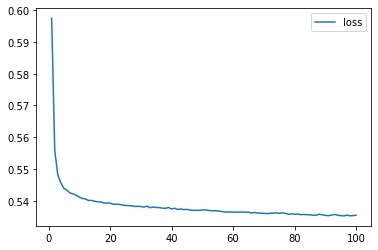

In [35]:
# plot loss
df_plot.plot(y="loss")

<AxesSubplot:>

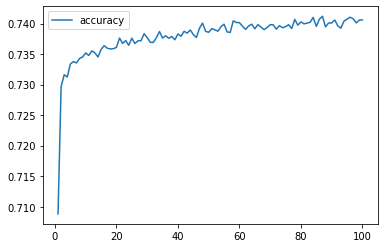

In [36]:
# plot accuracy

df_plot.plot(y= 'accuracy')

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

528/528 - 0s - loss: 0.5583 - accuracy: 0.7208
Loss: 0.5582976341247559, Accuracy: 0.720751166343689


In [41]:
cardio_df.to_csv(r'Resources\Cleaned200.csv', index = False)